# Deep Learning(CNNs) in Data science

## Introduction
In the last few years, deep learning has proven itself to be the gold standard when it comes to classifying images. Deep Learning is an umbrella term that encompasses several multi layered neural networks. While Deep Learning can be applied to many problem settings, two application areas where it has produced remarkable results are in image classification and speech recognition. For image classification, the most popular network models are called Convolutional Neural Networks(CNN), and for speech recognition, the networks used are Recurrent Neural Networks(RNN)

In this tutorial, we shall introduce Convolutional Neural Networks(CNN) to the reader, and demonstrate their use in image classification and an application in style detection specifically in the context of fashion.

This tutorial would help the reader understand -
* Convolution in the context of images.
* Motivation for using CNNs over traditional fully connected Neural Nets for image classification.
* How to Create and manipulate Deep Learning models using tensorflow.
* How CNNs can be used in a data science setting.

Note that the tutorial expects the reader to have some background in machine learning and neural networks as taught in class.


## Building blocks of a CNN:

### Convolutional Layer:
The convolution operation in the context of deep learning refers to a simple dot product of a region in an image with another matrix which is known as the filter or kernel.

It is illustrated in the image below(Taken from the book Deeplearning by Ian Goodfellow)
<img src="http://drive.google.com/uc?export=view&id=1gP_5Ig0xuaFKl3mYJ-Ce9BnYP7mYur_u">
In this picture, the size of the kernel is 2x2 and the result of the point multiplication with various 2x2 sections in the input is shown.
The picture shows the covolution operation between a 2D input and a 2D filter. Images with colour usually have 3 data planes - one each for Red, Blue and Green color components. Each component is called a channel, and the input would generally have the shape - [n_channels(3), Height, Width]. Similarly, the filters used would also be 3D, where a matrix is specified for each channel. The result is still the dot product of an image region with the filter. <br>
The kernel in this picture moves one step in x and y directions. Thus, the filter in this case is said to have a stride of 1

### Pooling Layer:
A pooling function replaces the output of the layer with a summary of a region of inputs. For example maxpooling would output the maximum value within a certain window of the input. The purpose of the pooling layer is to make the network invariant to small translations(the object of interest could be at a slightly different location in the image). In the image below a 2x2 maxpooling operation is demonstrated
<img src="http://drive.google.com/uc?export=view&id=1r3cm1kany6g9FAtMeLF8DJqJ_XI-rxU_">

### Dropout Regularization:
Dropout layer drops certain neurons in a layer during training. This acts as a form of regularization so as to avoid overfitting.
<img src="http://drive.google.com/uc?export=view&id=1Xik1Gmyr5cUaNTGS3lPZ_ZD05noe-mDv">

### Fully connected Layer:
After several layers of convolution + maxpool + dropout(optional), you would have a fully connected layer at the end, the output of which would be a classification score
<img src="http://drive.google.com/uc?export=view&id=1D-FFFXgG3-CrYCVJqIbyj5cQaRI5LSa7">

## Our model:
Deep learning models for image classification are an area of active research, and every year new models emerge that question what we know about CNNs. One such model is described in the paper - https://arxiv.org/pdf/1412.6806.pdf, and this is what we would be implementing in this tutorial.

The key takeaways from this paper are as follows -
- Use strided convolution instead of max pooling for dimensionality reduction.
- Use smaller convulutional kernels, that would greatly reduce the number of parameters and thus serve as a form of regularization.
- Use 1x1 convolutions at the top layers. The idea being that "if the image area covered by units in the topmost convolutional layer covers a portion of the image large enough to recognize its content (i.e. the object we want to recognize) then fully connected layers can also be replaced by simple 1-by-1 convolutions.This leads to predictions of object classes at different positions which can then simply be averaged over the whole image." Thus the fully connected layers at the top could simply be replaced by an averaging layer.

The model graph looks like this.<br>
3x3 conv with 96 filters, stride-1<br>
3x3 conv with 96 filters, stride-1<br>
3x3 conv with 96 filters, stride-2<br>
Dropout - 0.5 - Drop Neurons with probability 0.5<br>
3x3 conv with 192 filters, stride-1<br>
3x3 conv with 192 filters, stride-1<br>
3x3 conv with 192 filters, stride-2<br>
Dropout - 0.5<br>
3x3 conv with 192 filters, stride-1<br>
1x1 conv with 192 filters, stride-1<br>
1x1 conv with 192 filters, stride-1<br>
1x1 conv with 10 filters, stride-1<br>
Average pooling<br>
softmax->cross entropy<br>
Adam Optimizer<br>
Note that all the above conv layers use a ReLu activation function.


## Dataset
The dataset we will be using for this tutorial is the Fashion1000 dataset. <br>
Here I shall briefly discuss how the dataset was curated and the parts of the dataset that we would be using for training our model.<br>
The team obtained a list of fashion topics or tags from the Wikipedia page "Index of Fashion articles". They then used this information as category labels and went about crawling flickr to download images and metadata related to these tags. They were able to download upwards of 32000 images that fall under 262 categories, where each category contains atleast 10 images. It should be noted that the dataset by itself is extremely noisy, since most of the images in a category are completely unrelated to fashion let alone the category under which it was downloaded. For instance you might see an image of a sunset under the label "Choker". This is probably more reflective of users' tagging behaviour than a bug in their crawler. They then ran a crowd sourcing effort, where they would show a user 4 images, and ask them to answer a variety of questions. The questions that are most related to what we use in this tutorial are the following -<br>
* Fashion / Clothing Related
    Is the image related to fashion or clothing? In other words, does the image show a clothing item or
    fashion accessory at all?
* Specialty clothing item
    In your opinion, does the picture below show (Insert Category under which it was collected)?
    for eg: If the category under which the image was download is "Jacket", the question would be-
    In your opinion, does the picture below show Jacket?
* Number of people
    How many people are depicted in the picture?
    
For more information related to the dataset, please refer their readme at -<br> http://www.st.ewi.tudelft.nl/~bozzon/fashion10000dataset/Fashion10000%20Readme2.pdf<br>

One can download the dataset as 10 zip files(each 1GB) from -<br>
http://www.st.ewi.tudelft.nl/~bozzon/fashion10000dataset/download.html<br>
Once downloaded extract it in the same folder as this notebook.<br>
You should see a folder 'Fashion10000'. All the images would be under 'Fashion10000/Photos/(category_name)' 

The csv containing the crowd sourced survey responses can be downloaded from -<br>
http://www.st.ewi.tudelft.nl/~bozzon/fashion10000dataset/Fashion10000_Annotations.zip<br>
Extract and ensure that the file - 'Annotation_PerImage_All.csv' is in the same folder as this notebook.<br>

In supervised machine learning, one of the hardest tasks is to obtain correctly labelled training data. We shall use the downloaded dataset and the responses recorded in the survey to filter out data that we would be using for training our model.

The Annotation_perImage_All.csv contains the survey responses for each image in the dataset. We then iterate over this csv and select only those rows where the item has been deemed an -
* Item of fashion (Q1)
* Correctly belongs to the category under which it was downloaded(Q2)
* The image in question has one person in it.(Q3)

In [163]:
import csv
from pprint import pprint

with open('Annotation_PerImage_All.csv','r', encoding="utf8") as f: 
    dr = csv.DictReader(f)
    to_db = [(i['PictureURL'], i['Category'], i['Majority Q2'], i['Majority Q3'], i['Majority Q1']) for i in dr]

#to_db    
db_filtered = []
for entry in to_db:
    if entry[2] == 'yes' and entry[3] == 'onepeople' and entry[4] == 'yes':
        db_filtered.append(entry)
        
print('Number of images filtered:', len(db_filtered))
pprint(db_filtered[:5])

Number of images filtered: 5242
[('http://farm7.staticflickr.com/6127/5999339348_72c5eb4b86.jpg',
  'Headscarf',
  'yes',
  'onepeople',
  'yes'),
 ('http://farm7.staticflickr.com/6002/6003267626_a7fcbdf16d.jpg',
  'Headscarf',
  'yes',
  'onepeople',
  'yes'),
 ('http://farm4.staticflickr.com/3457/3969747322_1af129fcb3.jpg',
  'Jacket',
  'yes',
  'onepeople',
  'yes'),
 ('http://farm3.staticflickr.com/2438/3969747690_981ee36570.jpg',
  'Jacket',
  'yes',
  'onepeople',
  'yes'),
 ('http://farm3.staticflickr.com/2588/3978591249_fe6204935f.jpg',
  'Jacket',
  'yes',
  'onepeople',
  'yes')]


Now that we have a filtered list of images, it could be that not all the images in the list are in the downloaded dataset.<br>
Hence we check if the file actually exists and trim our list accordingly.<br>
The filename is extracted from the URL as -<br>
URL - http://farm3.staticflickr.com/2588/3978591249_fe6204935f.jpg<br>
Filename - 3978591249.jpg<br>
The directory under which the file is present is obtained using the category value for eg:<br>
Fashion10000/Photos/Jacket<br>
Now the full file path becomes -<br>
Fashion10000/Photos/Jacket/3978591249.jpg<br>
This how the files are stored in the dataset.<br>
We now check to see if the file exists on disk, and filter accordingly<br>

In [164]:
import os
toplvl = 'Fashion10000/Photos/'
db_exists = []
for i in db_filtered:
    fname = i[0].split('/')[4].split('_')[0] + '.jpg'
    directory = i[1]
    if os.path.exists(toplvl + directory + '/' + fname):
        db_exists.append(i)

db_filtered = db_exists       
print('Number of files that exist on disk', len(db_filtered))

Number of files that exist on disk 5229


We now create list of all category labels and then create a dictionary that maps the category to its index in the list. We would be using this index as our training label when modelling the network.

In [166]:
cat = set()
for i in db_exists:
    cat.add(i[1])
cat = list(cat)
d = {i : x  for x, i in enumerate(cat)}
print('Number of filtered categories:', len(cat))
{k: d[k] for k in list(d)[:20]}

Number of filtered categories: 217


{'A-line': 6,
 'Athletic shoe': 2,
 'Ball gown': 11,
 'Cuff': 19,
 'Fashion': 16,
 'Garter (stockings)': 14,
 'Handbag': 0,
 'Hat Act': 18,
 'Headscarf': 9,
 'Huipil': 3,
 'Necktie': 10,
 'Overall': 7,
 'Overcoat': 5,
 'Pedal pushers': 15,
 'Revers': 17,
 'Sequin': 4,
 'Straw hat': 12,
 'Toga': 8,
 'Victoriana': 1,
 'Yukata': 13}

Now we can go ahead and create numpy arrays that would store our training data and training labels. Note that each image would be of height and width 100 pixels and would contain 3 channels(1 each for R,G,B). We would resize all our input images to 100x100 for training and prediction.

In [167]:
import numpy as np
img_size = 100  
x = np.zeros((len(db_filtered),img_size, img_size,3))
y = np.zeros((len(db_filtered)))
print(x.shape, y.shape)

(5229, 100, 100, 3) (5229,)


Now read images, resize to 100x100 and store in the numpy arrays.
Here 'x' would be our training data and 'y' would be the category label as obtained from the dictionary 'd' that we created earlier.

In [168]:
from scipy.misc import imread, imresize

toplvl = 'Fashion10000/Photos/'
for idx, i in enumerate(db_filtered):
    fname = i[0].split('/')[4].split('_')[0] + '.jpg'
    directory = i[1]
    try:
        img = imread(toplvl + directory + '/' + fname)
        x[idx, :, :, :] = imresize(img, (img_size, img_size))
        y[idx] = d[i[1]]
    except:
        pass
    
print(x.shape, y.shape)
#Set our training variables
X_train = x
y_train = y

(5229, 100, 100, 3) (5229,)


Lets visualize some inputs

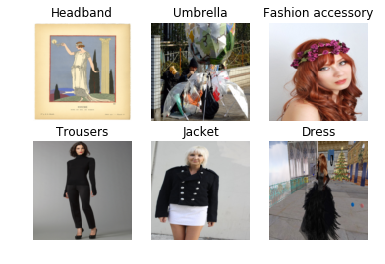

In [211]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

def imshow_noaxis(img):
    """ Tiny helper to show images as uint8 and remove axis labels """
    plt.imshow(img.astype('uint8'))
    plt.gca().axis('off')
    
plt.subplot(2, 3, 1)
imshow_noaxis(x[10])
plt.title(cat[int(y[10])])
plt.subplot(2, 3, 2)
imshow_noaxis(x[1789])
plt.title(cat[int(y[1789])])
plt.subplot(2, 3, 3)
imshow_noaxis(x[38])
plt.title(cat[int(y[38])])
plt.subplot(2, 3, 4)
imshow_noaxis(x[4459])
plt.title(cat[int(y[4459])])
plt.subplot(2, 3, 5)
imshow_noaxis(x[194])
plt.title(cat[int(y[194])])
plt.subplot(2, 3, 6)
imshow_noaxis(x[2934])
plt.title(cat[int(y[2934])])

plt.show()

We can now store the input data and labels to disk. As we see later, we would need this to train our model on a GPU cluster. 

In [212]:
np.save('train_x.npy', x, allow_pickle=False)
np.save('train_y.npy', y, allow_pickle=False)

Now that we have our training data, let us proceed to create our CNN using tensorflow.

## Tensorflow 
Tensorflow is a library that enables data flow programming across a variety of applications. The library helps users create  data flow graphs and control the flow of data between the nodes. The library is especially useful for machine learning since it supports almost all of the popular activation functions, loss functions, optimizers, network layers and operations like backpropagation out of the box.

In order to install tensorflow, simply run - <br> 
'conda install tensorflow' on your anaconda command line.

Import tensorflow and implement our model that we had discussed earlier.

In [170]:
import tensorflow as tf

def mymodel(X,y, is_training):
    
    Wconv1 = tf.get_variable("Wconv1", shape=[3, 3, 3, 96])
    bconv1 = tf.get_variable("bconv1", shape=[96])
    
    a1 = tf.nn.conv2d(X, Wconv1, strides=[1,1,1,1], padding='SAME') + bconv1
    h1 = tf.nn.relu(a1)
    
    Wconv2 = tf.get_variable("Wconv2", shape=[3, 3, 96, 96])
    bconv2 = tf.get_variable("bconv2", shape=[96])
    
    a1 = tf.nn.conv2d(h1, Wconv2, strides=[1,1,1,1], padding='SAME') + bconv2
    h1 = tf.nn.relu(a1)
    
    Wconv3 = tf.get_variable("Wconv3", shape=[3, 3, 96, 96])
    bconv3 = tf.get_variable("bconv3", shape=[96])
    
    a1 = tf.nn.conv2d(h1, Wconv3, strides=[1,2,2,1], padding='SAME') + bconv3
    h1 = tf.nn.relu(a1)
    
    h1 = tf.nn.dropout(h1, 0.5)
    
    Wconv4 = tf.get_variable("Wconv4", shape=[3, 3, 96, 192])
    bconv4 = tf.get_variable("bconv4", shape=[192])
    
    a1 = tf.nn.conv2d(h1, Wconv4, strides=[1,1,1,1], padding='SAME') + bconv4
    h1 = tf.nn.relu(a1)
    
    Wconv5 = tf.get_variable("Wconv5", shape=[3, 3, 192, 192])
    bconv5 = tf.get_variable("bconv5", shape=[192])
    
    a1 = tf.nn.conv2d(h1, Wconv5, strides=[1,1,1,1], padding='SAME') + bconv5
    h1 = tf.nn.relu(a1)
    
    Wconv6 = tf.get_variable("Wconv6", shape=[3, 3, 192, 192])
    bconv6 = tf.get_variable("bconv6", shape=[192])
    
    a1 = tf.nn.conv2d(h1, Wconv6, strides=[1,2,2,1], padding='SAME') + bconv6
    h1 = tf.nn.relu(a1)
    
    h1 = tf.nn.dropout(h1, 0.5)
    
    Wconv7 = tf.get_variable("Wconv7", shape=[3, 3, 192, 192])
    bconv7 = tf.get_variable("bconv7", shape=[192])
    
    a1 = tf.nn.conv2d(h1, Wconv7, strides=[1,1,1,1], padding='SAME') + bconv7
    h1 = tf.nn.relu(a1)
    
    Wconv8 = tf.get_variable("Wconv8", shape=[1, 1, 192, 192])
    bconv8 = tf.get_variable("bconv8", shape=[192])
    
    a1 = tf.nn.conv2d(h1, Wconv8, strides=[1,1,1,1], padding='SAME') + bconv8
    h1 = tf.nn.relu(a1)
    
    Wconv9 = tf.get_variable("Wconv9", shape=[1, 1, 192, 192])
    bconv9 = tf.get_variable("bconv9", shape=[192])
    
    a1 = tf.nn.conv2d(h1, Wconv9, strides=[1,1,1,1], padding='VALID') + bconv9
    h1 = tf.nn.relu(a1)
    
    Wconv10 = tf.get_variable("Wconv10", shape=[1, 1, 192, 217])
    bconv10 = tf.get_variable("bconv10", shape=[217])
    
    a1 = tf.nn.conv2d(h1, Wconv10, strides=[1,1,1,1], padding='VALID') + bconv10
    h1 = tf.nn.relu(a1)
    
    dims = h1.get_shape()
    sz = int( dims[1] * dims[2] * dims[3])
    pooled = tf.layers.average_pooling2d(h1,[dims[1],dims[2]],[dims[1],dims[2]] )

    return tf.squeeze(pooled)


We shall go over the above models definition line by line - <br>
Wconv1 = tf.get_variable("Wconv1", shape=[3, 3, 3, 96])<br>
bconv1 = tf.get_variable("bconv1", shape=[96])<br>

Wconv1 and bconv1 are the variables used for storing the weights in the first layer.<br>
The shape of Wconv1 essentially defines the convolutional kernel in this layer.<br>
The shape is given by [height, width, num channels, number of kernels]<br>
The number of channels specified here is 3 since our input contains three color channels(R,G,B).<br>
As you can see, the number of filters in this layer is specified to be 96. This would serve as the number of input channels to the next layer.<br>
The bias weights are of shape [96,] since each of the kernels would have one bias weight.<br>

a1 = tf.nn.conv2d(X, Wconv1, strides=[1,1,1,1], padding='SAME') + bconv1<br>
h1 = tf.nn.relu(a1)<br>

We now define a convolutional layer with stride 1. The stride[1] and stride[2] values essentially determine the stride of the kernel along the x and y directions. stride[0] and stride[3] are always expected to be 1.<br>
The padding = 'SAME' would preserve the output dimensions of the layer to match the input. Tensorflow would take care of adding the necessary padding such that the dimensions are preserved.<br>
If padding were set to 'VALID' then tensorflow would not add any padding values to the input of that layer.<br>
tf.nn.conv2d() creates a 2D convolutional layer and we add the bias to this and store the outpt to a1. <br>
h1 is essentially the activation 'relu' added to this layer.<br> 

We now stack up several such layers with the relevant strides as discussed earlier. As discussed in the paper, our last layers are 1x1 convolutional layers followed by an average pooling layer. The output of this is then fed to the Squeeze() function that removes dimensions of size 1 and returns a shape of [num_categories,].

Now that we have defined our model, we would need to define placeholders for the input and output variables. 
'X' and 'Y' are the training data and labels. 'is_training' is a variable that is set to 'True' while training and 'False' while predicting. Though this variable is not used in this model, it is generally good practice to have such variables in hand since some models(like those with batch normalization) would behave different during training and predicting.'y_out' is now the output of our model.

In [173]:
import tensorflow as tf

tf.reset_default_graph()

# define our input (e.g. the data that changes every batch)
# The first dim is None, and gets sets automatically based on batch size fed in
X = tf.placeholder(tf.float32, [None, 100, 100, 3])
Y = tf.placeholder(tf.int64, [None])
is_training = tf.placeholder(tf.bool)    

# define model
y_out = mymodel(X,Y,is_training)

Now we specify the loss function and the optimizer. We pass the output through a softmax layer and use an Adam optimizer which is an extension of stochastic gradient descent, especially suited to deep learning tasks. The optimizer is then instructed to minimize the mean cross entropy loss during training.

We don't use any validation data during training, as we are only interested in fitting the training data. Since the training data has 217 classes, there is bound to be significant overlap. For eg: A picture of man wearing a jacket and a baseball cap could be classified under "baseball cap". 

In [177]:
# On a GPU cluster, use the entire dataset for training. 
#mean_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_out, labels=tf.one_hot(y,217)))
# For CPU training use a smaller batch. The system might run out of memory if the entire batch is used.
mean_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_out, labels=tf.one_hot(y[:64],217)))
optimizer = tf.train.AdamOptimizer(5e-4)
train_step = optimizer.minimize(mean_loss)


Now we train the model using all the loss functions, optimizers and training data that we have defined thus far.<br>
For training deep learning networks, we must use a machine that has a GPU and lots of memory . It should be possible to fit all the training data and models in memory and if one does not use a GPU, training simply takes too long(in the order of days). This model was trained on a GPU cluster. The code here runs on a smaller batch(64 entries) on the CPU. For GPU training uncomment the indicated lines in the code cells above and below.<br>

Every tensorflow application requires a "Session" to be defined. We then perform the usual batch based iterative training. Another important thing to note is the "feed_dict" dictionary that is passed to the session.run() operation. This dictionary maps the placeholders that we had defined earlier to actual values that would be used in training. <br>

The saver.save operation saves the model and its parameters after training. We can then use the saved model to make predictions. <br>

The CPU demo training code on a small batch of 64 inputs with 217 categories over 10 epochs produces an accuracy of around 10%. <br>

Since I performed the training on a GPU cluster, I have copied the output to a "RawNBConvert" cell below. The training was done over 100 epochs, using a batch size of 64. The machine used had a Tesla K80 GPU and the training took about 3 hours.THe accuracy obtained was close to 78%.<br>

I have uploaded the model trained on the GPU to my drive. Since the size of the model is around 16MB, it is too big to submit along with the notebook. We shall later download this and use it to make predictions.


In [179]:
import math

def run_model(session, predict, mean_loss,X,y,is_training,Xd, yd, epochs=1, batch_size=64, print_every=100,
              training=None, plot_losses=False):
    # have tensorflow compute accuracy
    correct_prediction = tf.equal(tf.argmax(predict,1), y)
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    # shuffle indicies
    train_indicies = np.arange(Xd.shape[0])
    np.random.shuffle(train_indicies)
    training_now = training is not None
    
    # setting up variables we want to compute (and optimizing)
    # if we have a training function, add that to things we compute
    variables = [mean_loss,correct_prediction,accuracy]
    if training_now:
        variables[-1] = training
    
    # counter 
    iter_cnt = 0
    for e in range(epochs):
        # keep track of losses and accuracy
        correct = 0
        losses = []
        # make sure we iterate over the dataset once
        for i in range(int(math.ceil(Xd.shape[0]/batch_size))):
            # generate indicies for the batch
            start_idx = (i*batch_size)%Xd.shape[0]
            idx = train_indicies[start_idx:start_idx+batch_size]
            
            # create a feed dictionary for this batch
            feed_dict = {X: Xd[idx,:],
                         y: yd[idx],
                         is_training: training_now }
            # get batch size
            actual_batch_size = yd[idx].shape[0]
            
            # have tensorflow compute loss and correct predictions
            # and (if given) perform a training step
            loss, corr, _ = session.run(variables,feed_dict=feed_dict)
            
            # aggregate performance stats
            losses.append(loss*actual_batch_size)
            correct += np.sum(corr)
            
            # print every now and then
            if training_now and (iter_cnt % print_every) == 0:
                print("Iteration {0}: with minibatch training loss = {1:.3g} and accuracy of {2:.2g}"\
                      .format(iter_cnt,loss,np.sum(corr)/actual_batch_size))
            iter_cnt += 1
        total_correct = correct/Xd.shape[0]
        total_loss = np.sum(losses)/Xd.shape[0]
        print("Epoch {2}, Overall loss = {0:.3g} and accuracy of {1:.3g}"\
              .format(total_loss,total_correct,e+1))
        if plot_losses:
            plt.plot(losses)
            plt.grid(True)
            plt.title('Epoch {} Loss'.format(e+1))
            plt.xlabel('minibatch number')
            plt.ylabel('minibatch loss')
            plt.show()
    return total_loss,total_correct

with tf.Session() as sess:
        #with tf.device("/gpu:0") as dev: Uncomment this for GPU training
        with tf.device("/cpu:0") as dev:
            tf.global_variables_initializer().run()
            tf.set_random_seed(1)
            #saver = tf.train.Saver() # Uncomment this for GPU training
            # Test full set only on GPU cluster. A regular desktop may run out of memory
            #run_model(sess,y_out,mean_loss,X,y,is_training,X_train,y_train,100,64,100,train_step) # Uncomment this for GPU training
           
            # This is just for demonstration and will not yield accurate results. For accurate results run on GPU. See above.
            run_model(sess,y_out,mean_loss,X,Y,is_training,X_train[:64],y_train[:64],10,64,100,train_step)
            #saver.save(sess, "/home/user/DS/mymodel_1") #Uncomment this for GPU training


Iteration 0: with minibatch training loss = 5.98 and accuracy of 0
Epoch 1, Overall loss = 5.98 and accuracy of 0
Epoch 2, Overall loss = 5.18 and accuracy of 0.0625
Epoch 3, Overall loss = 4.9 and accuracy of 0.0625
Epoch 4, Overall loss = 4.64 and accuracy of 0.0625
Epoch 5, Overall loss = 4.49 and accuracy of 0.109
Epoch 6, Overall loss = 4.27 and accuracy of 0.109
Epoch 7, Overall loss = 4.11 and accuracy of 0.109
Epoch 8, Overall loss = 4.02 and accuracy of 0.109
Epoch 9, Overall loss = 3.84 and accuracy of 0.109
Epoch 10, Overall loss = 3.79 and accuracy of 0.0625


### Application/ Prediction
Imagine that you are a fashion retailer and are about to place your next order. It would be great if there were some way that you could figure out what kind of clothes are trending so as to realize good sales. Now if a major event like the Academy awards/Oscars has just taken place, the clothes that the attendees or celebrities wear would certainly affect the ongoing trends. Now, if we could obtain a bunch of images of celebrities from this setting, we could run our model and get a list of trending categories. This would be of value to a retailer who can then use this information while placing their next order.

The original goal was to use the Instagram API to obtain images specific to a time and location. Getting access to the API is not straightforward as one needs to submit their applications intent to facebook, and after review one may/may not get access. However there is a site https://www.picodash.com/ that lets you crawl through public instagram feeds based on time and location. They even let you export the data over a spreadsheet. 

Users can sign up with a $8 monthly fee and get access to all the features. However, owing to the recent Cambridge Analytica fiasco, Facebook has started reviewing app permissions. As a result of this, their access is currently suspended. I was able to access the site on 28-Mar, so I guess this is very very recent.

I did sign up for the service and was able to search for all instagram public posts for - <br>
Location - Dolby Theatre, Los Angeles (This was the venue of the Academy awards 2018) <br>
Time - March 4 between 13:00-23:00pm.

From the available posts, I had downloaded a few images for testing. In the section below, we shall see how the model performs for one of the images.

We shall be using the model trained on the GPU to perform predictions. The model is shared on my drive.<br>

Download the model from https://drive.google.com/open?id=1oU6LxjsPMyVmCfYHvyAZFikyqTSnn702 and extract in the same folder as the tutorial. You would see the following four files-
* mymodel_1.data-00000-of-00001
* mymodel_1.index
* checkpoint
* mymodel_1.meta

Off these files, mymodel_1.meta contains the graph of the network and mymodel_1.data-00000-of-00001 contains the parameters of the model. <br>

We can restore the network using these two files. Since we trained the model on a GPU but wish to predict on the CPU, we must set the parameters clear_devices and allow_soft_placement to True as done below


In [190]:
#with as sess:
# clear old variables
tf.reset_default_graph()

sess = tf.Session(config=tf.ConfigProto(allow_soft_placement=True)) 
#with tf.Session() as sess:
#First let's load meta graph and restore weights
saver = tf.train.import_meta_graph('mymodel_1.meta',clear_devices = True)
saver.restore(sess,'mymodel_1')#tf.train.latest_checkpoint('./'))    

INFO:tensorflow:Restoring parameters from mymodel_1


Now that we've restored our model, we need to retrieve the placeholder variables so that we can pass in a new input for prediction.

In [191]:
graph = tf.get_default_graph()
X_m = graph.get_tensor_by_name("Placeholder:0")
y_m = graph.get_tensor_by_name("Placeholder_1:0")
y_o = graph.get_tensor_by_name("Squeeze:0")
is_training = graph.get_tensor_by_name("Placeholder_2:0")
#op_to_restore = graph.get_tensor_by_name("op_to_restore:0")
print(X_m.shape, y_m.shape, y_o.shape)
print(X_m.dtype, y_m.dtype, y_o.dtype)


(?, 100, 100, 3) (?,) <unknown>
<dtype: 'float32'> <dtype: 'int64'> <dtype: 'float32'>


Now read in our image for prediction. 
<img src="http://drive.google.com/uc?export=view&id=1TBAIF5WKtwYeAM1TOLz2NXcEy5SeNgIY">

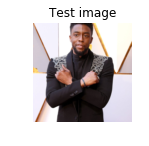

In [217]:
from urllib.request import urlopen
from scipy.misc import imread

url = 'http://drive.google.com/uc?export=view&id=1TBAIF5WKtwYeAM1TOLz2NXcEy5SeNgIY'

file = urlopen(url)
img = imread(file)
#img = imread('test_2.jpg')

rsz = np.zeros((1,img_size, img_size,3))
rsz[0,:,:,:] = imresize(img, (img_size, img_size))

plt.subplot(2, 1, 1)
imshow_noax(rsz[0], normalize=False)
plt.title('Test image')
plt.show()


Pass this as input to the model, run the output through a softmax to get a probability distribution over categories and print the top 10 most likely categories along with their confidence(probability) values.

In [218]:
prob = tf.nn.softmax(y_o)


#ans = sess.run(prob,feed_dict={X_m:x[17:18],is_training:False})
ans = sess.run(prob,feed_dict={X_m:rsz,is_training:False})
arr = np.array(ans)
sor = arr.argsort()[-10:][::-1]
for i in sor:
       print(cat[i], ans[i])

Tuxedo 0.965844
Fashion 0.0129306
Headband 0.00535606
Dress 0.00445963
Lapel pin 0.00178803
Cocktail dress 0.00174472
Smoking jacket 0.00159102
Jacket 0.00116615
Leggings 0.00108393
Necktie 0.00108297


As you can see, the model is able to classify with high confidence that the celebrity is wearing a tuxedo. What is even more interesting are the other classes that have showed up. For eg: "Smoking jacket". The embellishments on the tuxedo are fairly typical of the kind of patterns that one might see in a smoking jacket. Its quite remarkable that it is one of the top 10 classes.

We can run this on several images, and get a bunch of trending styles.

## Conclusion:
I hope the reader has obtained a decent understanding of CNNs, tensorflow and their application in image classification.
One can see the power that Deep Learning methods bring to the table when identifying patterns/trends in highly unstructured data like images. While we have just scratched the surface here by discussion just one application area, these methods have the potential to have profound impact in really critical application areas like Healthcare, Security etc.

